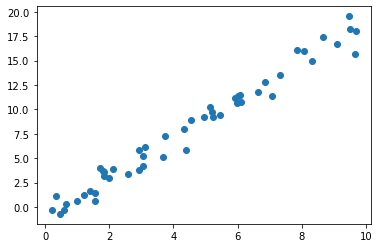

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42) #seeding #컴퓨터의 난수는 의사난수
x = 10 * rng.rand(50)
y = 2 * x-1 + rng.randn(50)
plt.scatter(x,y);

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) # 인스턴스
model

LinearRegression()

In [ ]:
# 선형회귀는 : 절편과 기울기
- regularzation : 규제 : 과적합 -> 일반화 ( 이미 에러가 있다고 최적점으로 가는 것을 막는 것)
- lasso : L1, 차의 절대값
- ridge : L2, 차의 제곱값
- elasticNet : L1 + L2

In [3]:
X = x[:, np.newaxis] #행을 열로 바꿈
X.shape

(50, 1)

In [4]:
model.fit(X,y) # 학습 - predict 

LinearRegression()

In [5]:
model.coef_

array([1.9776566])

In [6]:
model.intercept_

-0.9033107255311164

In [7]:
xfit = np.linspace(-1, 11)

In [9]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

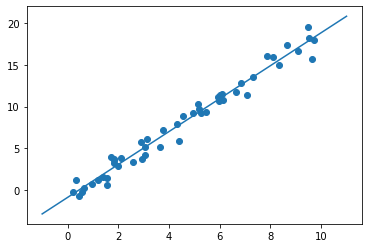

In [10]:
plt.scatter(x,y)
plt.plot(xfit, yfit)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42) # 승화 샘플링(stratify)

ridge = Ridge(alpha=0.01, max_iter=100).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.78
테스트 세트 점수 : 0.74


In [24]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0,2,1,3]
y_true = [0,1,2,3]
print(accuracy_score(y_true, y_pred))
accuracy_score(y_true, y_pred, normalize=False)

0.5


2

In [ ]:
# 교차분석 (10덩어리)
# train / validation/ test

In [27]:
# scikit에서 제공하는 데이터 : data, target
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf = svm.SVC(gamma="scale", random_state=0) # 분류기
cross_val_score(clf, X, y, scoring="recall_macro", cv=5)

array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

In [29]:
from sklearn.metrics import confusion_matrix # 혼동행렬
y_true = [2,0,2,2,0,1]
y_pred = [0,0,2,2,0,2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]], dtype=int64)

In [40]:
import sklearn.metrics as metrics
y = np.array([1,1,1,1,0,0]) # 실제
p = np.array([1,1,0,0,0,0]) # 예측
accuracy = np.mean(np.equal(y,p)) # T : 4 , F : 2
right = np.sum(y * p == 1) # 2개 TP를 구하고 있음
precision = right / np.sum(p) # 예측값 정확도
recall = right / np.sum(y) # 재현율 = 2/참4 = 0.5
f1 = 2* precision*recall/(precision*recall) 

print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1',f1)

print('accuracy',metrics.accuracy_score(y,p))
print('precision',metrics.precision_score(y,p))
print('recall',metrics.recall_score(y,p))
print('f1',metrics.f1_score(y,p))

print(metrics.classification_report(y,p))
print(metrics.confusion_matrix(y,p))
# macro avg = (normal+abnormal) / 2 * precision
# weighted avg = noraml/(normal*abnormal) * precision

accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 2.0
accuracy 0.6666666666666666
precision 1.0
recall 0.5
f1 0.6666666666666666
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6

[[2 0]
 [2 2]]


In [ ]:
# 정규화 - 사이즈를 줄일려고
- 종속변수에 미치는 독립변수의 영향력을 동일하게 하기 위해서
- 건강 : 키(170) + 몸무게(60) : scale을 1로

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.]


<AxesSubplot:>

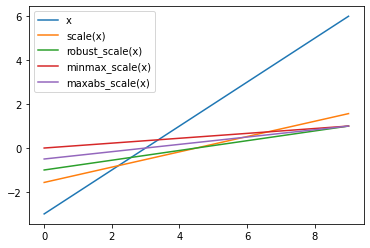

In [46]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
# 함수, class 베이스로 제공
#     -Noramlizer
#     -MinMaxSacaler
#     -RobustScaler : 이상치의 영향을 덜받음 중위수 사용
#     -StandScaler

from sklearn.preprocessing import scale, robust_scale, minmax_scale,maxabs_scale
print((np.arange(10, dtype=np.float)-3))
x = (np.arange(10, dtype=np.float) -3).reshape(-1, 1)
#print(x)
# h : hoizontal 수평으로   변수로 만들어라
# v : vertical 수직으로   데이터포인트로 만들어라
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]),
                columns=['x', "scale(x)","robust_scale(x)",
                        "minmax_scale(x)", "maxabs_scale(x)"])
df.plot()

<class 'sklearn.utils.Bunch'>
전처리전 평균 :  [5.84333333 3.05733333 3.758      1.19933333]
전처리전 std :  [0.82530129 0.43441097 1.75940407 0.75969263]
전처리후 mean :  [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
전처리후 std :  [1. 1. 1. 1.]


C:\Users\020\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


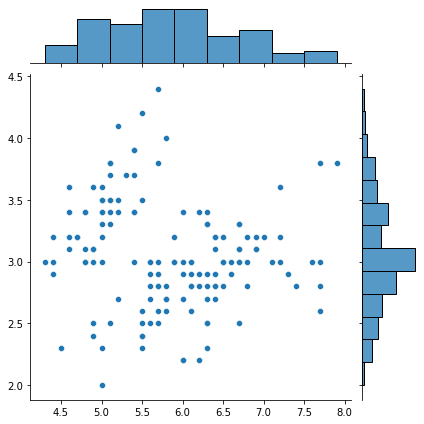

C:\Users\020\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


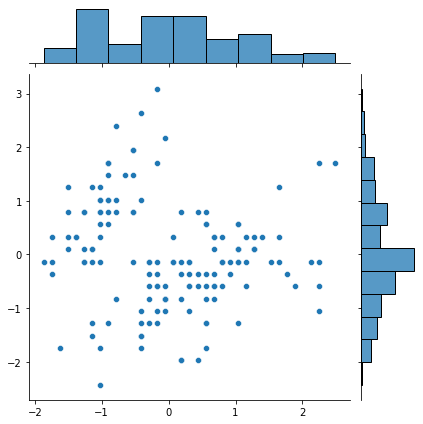

In [51]:
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()
print(type(iris))
data1 = iris.data
data2 = scale(iris.data)
print("전처리전 평균 : ", np.mean(data1, axis=0))
print("전처리전 std : ", np.std(data1, axis=0))
print("전처리후 mean : ", np.mean(data2, axis=0))
print("전처리후 std : ", np.std(data2, axis=0))

sns.jointplot(data1[:,0], data1[:,1])
plt.show()

sns.jointplot(data2[:,0], data2[:,1])
plt.show()

In [ ]:
# seikits의 특징
- 인터페이스 통일
- model_selection
- features_selection
- features_extraction
- decomposition
    - PCA, MDS, NMF, LLE(변형이 없음)
- 모델
    - 정보기반학습 : 정보이득이 있어야 나눈다. (불순도)
    - 확률기반학습 : naive bayes
    - 유사도 기반학습 : 거리와 내적을 이용해서 
            - clustering : kmeans, dbscan, hierachical clustering
            - knn
            - recommmendation 추천
    - 오치기반 학습
        - ANN -> DNN(CNN,RNN, GAN, AE)